# Undergraduate Admission Prediction in Bangladesh

## Introduction
This project aims to predict undergraduate admission in Bangladesh using various factors (E.g.: family economy, social media engagement, and study habits). 


### - Classification Vs Regression

In this project, we will use classification instead of regression because the goal is to predict a discrete outcome. We will study whether or not a student will be admitted in the university. Classification fits more in these of types of problem where our target variable (admission) is categorical or binary (1 for "admitted", 0 for "not admitted").

On the other hand, regression is used when the target variable is continuous and numerical, (E.g: predicting a student's GPA,  the number of study hours, etc...)

### - Problem Statement
The problem is a binary classification task to predict whether a student will be admitted to an university (1 for admitted, 0 for not admitted) based on various features

### - Objective

The objective is to apply classification models like Decision Trees, Random Forests to compare their performance and pick the right one.

## Questions (?):

### - What are the most important features for predicting X as a target variable?
Most of this dataset feautures seems to have value but the most significant ones for predicting X would be: Family_Economy, Residence, Social_Media_Engagement, Family_Education, Bad_Habits, School_Location, College_Location, SSC_GPA, HSC_GPA. We will see why these later on along the project. I will do some feature engineering before running the ML algorithms.

### - Which classification approach do you prefer for the prediction of X as a target variable, and why?
In thise case we will opt for classification instead of regression due to the fact that our target value is a numerical binary, 1 or 0, result. Classification will work better in this case, whereas regression will work out better when trying to bring a continuity output.

### - How to classify the loyal and churn customers using Support Vector Machines?
To find the optimal hyperplane, SVMs use a mathematical technique called kernel trick. A kernel is a function that transforms the data into a higher-dimensional space, where it is easier to find a linear separation. For example, if the data is not linearly separable in two dimensions, a kernel can map it to a three-dimensional space, where a hyperplane can be found. There are different types of kernels, such as linear, polynomial, radial basis function, and sigmoid, and each one has its own advantages and disadvantages. The choice of kernel depends on the nature and complexity of the data.

### - Why is dimensionality reduction important in machine learning?
Dimensionality reduction brings many advantages to your machine learning data, including: Fewer features mean less complexity. You will need less storage space because you have fewer data. Fewer features require less computation time.

### - What is the purpose of cross-validation in machine learning?
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.

### - Why is hyperparameter tuning necessary, and how is it done?
Hyperparameters directly control model structure, function, and performance. Hyperparameter tuning allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.
Techniques like GridSearchCV or RandomSearchCV are used to find the optimal combination of hyperparameters.
It is done by editing the model with Python code.

### - How do you address overfitting in machine learning models?
Fixing overfitting means preventing the model from learning associations that are specific to the training set. There are two common ways to fix overfitting: modifying the training set or regularizing the model.

### - What metrics are used to evaluate the model performance?
We have **Regression Metrics** (E.g: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R-Squared) and **Classification Metrics** (E.g: Confussion Matrix, Accuracy, Precision, Recall, F1-Score and AUC-ROC)


## Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



In [3]:
# Load dataset
df = pd.read_csv('Undergraduate Admission Test Survey in Bangladesh.csv')

# Show first few rows
df.head()

,SSC_GPA,HSC_GPA,Family_Economy,Residence,Family_Education,Politics,Social_Media_Engagement,Residence_with_Family,Duration_of_Study,College_Location,School_Location,Bad_Habits,Relationship,External_Factors,University
0,5.0,4.67,2,1,1,1,4,0,4,1,0,0,0,1,0
1,5.0,5.00,3,1,1,0,5,0,6,1,0,0,1,1,1
2,5.0,4.44,2,0,1,0,1,1,2,0,0,0,0,0,0
3,5.0,5.00,2,1,1,0,1,1,2,1,1,0,0,0,1
4,5.0,5.00,2,1,1,0,1,0,2,1,1,0,0,0,1


Based on the table:

- 1 means Yes
- 0 means No

Social_Media_Engagement = Hrs

Duration_of_Study = Years

## Data Exploration
Let's explore the dataset to understand the features, check for missing values, and look at the distributions of the target variable.

In [4]:
# Basic information and statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SSC_GPA                  600 non-null    float64
 1   HSC_GPA                  597 non-null    float64
 2   Family_Economy           600 non-null    int64  
 3   Residence                600 non-null    int64  
 4   Family_Education         600 non-null    int64  
 5   Politics                 600 non-null    int64  
 6   Social_Media_Engagement  600 non-null    int64  
 7   Residence_with_Family    600 non-null    int64  
 8   Duration_of_Study        600 non-null    int64  
 9   College_Location         600 non-null    int64  
 10  School_Location          600 non-null    int64  
 11  Bad_Habits               600 non-null    int64  
 12  Relationship             600 non-null    int64  
 13  External_Factors         600 non-null    int64  
 14  University               6

In [5]:
df.describe()

,SSC_GPA,HSC_GPA,Family_Economy,Residence,Family_Education,Politics,Social_Media_Engagement,Residence_with_Family,Duration_of_Study,College_Location,School_Location,Bad_Habits,Relationship,External_Factors,University
count,600.000000,597.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,4.853467,4.793032,2.673333,0.816667,0.866667,0.031667,2.828333,0.633333,5.586667,0.906667,0.653333,0.066667,0.231667,0.486667,0.566667
std,0.322999,0.382941,0.887657,0.387262,0.340218,0.175257,1.327328,0.482296,2.045188,0.291142,0.476306,0.249652,0.422249,0.500239,0.495949
min,2.990000,3.170000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.890000,4.750000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()

SSC_GPA                    0
HSC_GPA                    3
Family_Economy             0
Residence                  0
Family_Education           0
Politics                   0
Social_Media_Engagement    0
Residence_with_Family      0
Duration_of_Study          0
College_Location           0
School_Location            0
Bad_Habits                 0
Relationship               0
External_Factors           0
University                 0
dtype: int64

HSC_GPA has some missing values. Because we are dealing with numerical values a best practices to deal with these null values is to take the mean, media, or mode and place it in the row instead

In this case I will use mean

In [7]:
df['HSC_GPA'].fillna(df['HSC_GPA'].mean(), inplace=True)

# Verify
df.isnull().sum()

SSC_GPA                    0
HSC_GPA                    0
Family_Economy             0
Residence                  0
Family_Education           0
Politics                   0
Social_Media_Engagement    0
Residence_with_Family      0
Duration_of_Study          0
College_Location           0
School_Location            0
Bad_Habits                 0
Relationship               0
External_Factors           0
University                 0
dtype: int64

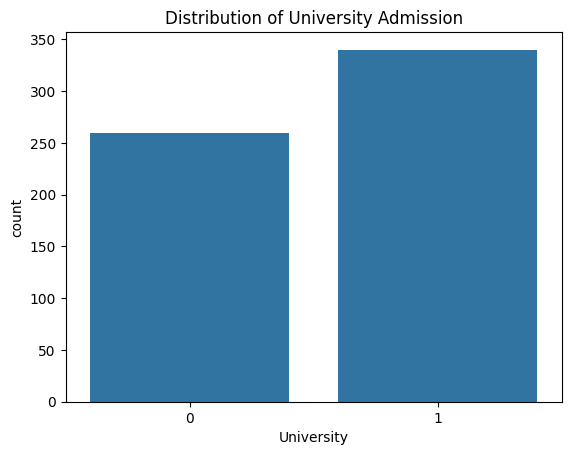

In [8]:
# Target variable distribution
sns.countplot(x='University', data=df)
plt.title('Distribution of University Admission')
plt.show()

It is nice that more than half of students gets admitted into the university based on this dataset.

## Feature Selection
For this project we will use the following features:
- Family_Economy
- Residence
- Social_Media_Engagement
- Family_Education
- Bad_Habits
- School_Location
- College_Location

These are the ones that draw my attention and I want to see how much impact these have in the student

But, statistical speaking I will add:
- SSC_GPA                   
- HSC_GPA

After "df.describe()" These ones were better spread out among the metrics, showing that they do have an impact in this dataset.

In [9]:
# Relevant features selection
selected_features = ['Family_Economy', 'Residence', 'Social_Media_Engagement', 
                     'Family_Education', 'Bad_Habits', 'School_Location', 'College_Location', 'HSC_GPA', 'SSC_GPA']

# Target
target_variable = 'University'

X = df[selected_features]
y = df[target_variable]

## Data Preprocessing
We will now split the dataset into training and testing sets. We will split it in two as best practices

In [10]:
# 70% training, 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Checking the split
print("Training set:\n", y_train.value_counts())
print("\nTest set:\n", y_test.value_counts())


Training set:
 University
1    238
0    182
Name: count, dtype: int64

Test set:
 University
1    102
0     78
Name: count, dtype: int64


In [11]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 9), (600,), (420, 9), (180, 9), (420,), (180,))

## Model Development

### - First Part

Here, we will run these models:

- Decision Tree 
- Random Forest
- SVM
- Tuning with GridSearchCV

After that, by analysing pure model performance we will show a **pre cross validation conclusion**.

### - Second Part

Before giving our final conclusion, now we will apply Cross Validations Metrics.

### - Third Part

Our last analysis attempt for this case study will be in a form of visualizations.

### - Final Thoughts

Based on a combination of these three, at this stage, we will evaluate each model performance and give our final **conclusion**.




## **First Part**

## Decision Tree Classifier
We'll begin by training a Decision Tree model and evaluating its performance.

In [12]:
# Initialize
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train
dt_classifier.fit(X_train, y_train)

# Prediction on test
y_pred_dt = dt_classifier.predict(X_test)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Printing results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:", class_report_dt)

Decision Tree Accuracy: 0.7611

Classification Report:               precision    recall  f1-score   support

           0       0.74      0.69      0.72        78
           1       0.78      0.81      0.79       102

    accuracy                           0.76       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180



## Random Forest Classifier
Next, let's train a Random Forest model and compare its performance.


In [13]:
# Initialize
rf_classifier = RandomForestClassifier(random_state=42)

# Train
rf_classifier.fit(X_train, y_train)

# Prediction in test
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Printing results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:", class_report_rf)


Random Forest Accuracy: 0.8000

Classification Report:               precision    recall  f1-score   support

           0       0.77      0.77      0.77        78
           1       0.82      0.82      0.82       102

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180



## SVM Classifier

In [14]:
# Initialize
svm_classifier = SVC(kernel='linear', random_state=42)

# Train
svm_classifier.fit(X_train, y_train)

# Predictions on test
y_pred_svm = svm_classifier.predict(X_test)

# Evaluation and Printing
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:", classification_report(y_test, y_pred_svm))


SVM Accuracy:  0.8

SVM Classification Report:               precision    recall  f1-score   support

           0       0.86      0.64      0.74        78
           1       0.77      0.92      0.84       102

    accuracy                           0.80       180
   macro avg       0.82      0.78      0.79       180
weighted avg       0.81      0.80      0.79       180



## Hyperparameter Tuning with GridSearchCV
We'll use GridSearchCV to tune the hyperparameters of the SVM  model and improve its performance.

In [15]:
# Tunning with GridSearchCV, lets do what internet recomended me.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)

# Taking the best
best_svm = grid_search.best_estimator_

# Best predictions on the test data
y_pred_best_svm = best_svm.predict(X_test)

# Evaluation of tuned SVM
print("Best SVM Classification Report:\n", classification_report(y_test, y_pred_best_svm))
print("Best SVM Accuracy: ", accuracy_score(y_test, y_pred_best_svm))

Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        78
           1       0.79      0.88      0.83       102

    accuracy                           0.80       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Best SVM Accuracy:  0.8


## Initial Model Comparison and Conclusion (before Cross validations)
We have trained multiple models and one with tuned hyperparameters. Let's compare their performance and choose the best model for predicting university admission.

- **Decision Tree**: Initial accuracy was 0.7611.
- **Random Forest**: Initial accuracy was 0.8.
- **SVM**: Initial accuracy was 0.8.
- **Tuned SVM**: After hyperparameter tuning, accuracy was 0.8.

Based on these results, we cannot recommend **any** model above the other in predicting undergraduate admission in Bangladesh.


## **Second Part : Cross Validation Metrics**

## Bias-Variance Tradeoff and Overfitting/Underfitting
Let's see how bias-variance tradeoff affects our model performance and check if overfitting or underfitting.

In [16]:
# Training and test accuracies for Decision Tree
train_accuracy_dt = dt_classifier.score(X_train, y_train)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Training Accuracy: {train_accuracy_dt:.4f}")
print(f"Decision Tree Test Accuracy: {test_accuracy_dt:.4f}")

# Training and test accuracies for Random Forest
train_accuracy_rf = rf_classifier.score(X_train, y_train)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nRandom Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

# Training and test accuracies for SVM
train_accuracy_svm = svm_classifier.score(X_train, y_train)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"\nSVM Training Accuracy: {train_accuracy_svm:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm:.4f}")

# Training and test accuracies for Tuned SVM
train_accuracy_tuned_svm = best_svm.score(X_train, y_train)
test_accuracy_tuned_svm = accuracy_score(y_test, y_pred_best_svm)

print(f"\nTuned SVM Training Accuracy: {train_accuracy_tuned_svm:.4f}")
print(f"Tuned SVM Test Accuracy: {test_accuracy_tuned_svm:.4f}")

Decision Tree Training Accuracy: 0.9238
Decision Tree Test Accuracy: 0.7611

Random Forest Training Accuracy: 0.9238
Random Forest Test Accuracy: 0.8000

SVM Training Accuracy: 0.7810
SVM Test Accuracy: 0.8000

Tuned SVM Training Accuracy: 0.8119
Tuned SVM Test Accuracy: 0.8000


High bias, **Underfitting**, seems to be a problem in this dataset, let me explain. All models performed better in the train set than in the test set, which is a sign of Underfitting. Let's continue with the K-Fold Cross validation to study them more.

**Random Forest** has the best performance in this case

## K-Fold Cross-Validation
We will now implement k-fold cross-validation to evaluate our models to ensure that the model's performance is consistent across different splits of the data. Tn this case we will use the 5-fold cross-validation.

In [17]:
# 5-fold cross-validations
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_scores_svm = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_svm = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')


# Results (Mean and Standard Deviation)
print(f"Decision Tree 5-Fold CV Accuracy:\nMean = {cv_scores_dt.mean():.4f} std = {cv_scores_dt.std():.4f}")
print(f"\nRandom Forest 5-Fold CV Accuracy:\nMean = {cv_scores_rf.mean():.4f} std = {cv_scores_rf.std():.4f}")
print(f"\nSVM 5-Fold CV Accuracy:\nMean {cv_scores_svm.mean():.4f} std =  {cv_scores_svm.std():.4f}")
print(f"\nTuned SVM 5-Fold CV Accuracy:\nMean {cv_scores_tuned_svm.mean():.4f} std =  {cv_scores_tuned_svm.std():.4f}")

Decision Tree 5-Fold CV Accuracy:
Mean = 0.7383 std = 0.0655

Random Forest 5-Fold CV Accuracy:
Mean = 0.7667 std = 0.0705

SVM 5-Fold CV Accuracy:
Mean 0.7483 std =  0.0721

Tuned SVM 5-Fold CV Accuracy:
Mean 0.7583 std =  0.0778


The average accuracy across all 5 folds seems to be better for the **Random forest**, whereas the low number in std in the Decision Tree seems to point the **Decision Tree** as a better performer.

## Performance Metrics: Precision, Recall, F1-Score
Time to calculate precision, recall, and F1-score to get a more detailed view of the model performance.

In [18]:
# Decision Tree metrics
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")

# Random Forest metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nRandom Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")

# SVM metrics
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"\nSVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")

# Tuned SVM metrics
precision_tuned_svm = precision_score(y_test, y_pred_best_svm)
recall_tuned_svm = recall_score(y_test, y_pred_best_svm)
f1_tuned_svm = f1_score(y_test, y_pred_best_svm)

print(f"\nTuned SVM Precision: {precision_tuned_svm:.4f}")
print(f"Tuned SVM Recall: {recall_tuned_svm:.4f}")
print(f"Tuned SVM F1-Score: {f1_tuned_svm:.4f}")

Decision Tree Precision: 0.7757
Decision Tree Recall: 0.8137
Decision Tree F1-Score: 0.7943

Random Forest Precision: 0.8235
Random Forest Recall: 0.8235
Random Forest F1-Score: 0.8235

SVM Precision: 0.7705
SVM Recall: 0.9216
SVM F1-Score: 0.8393

Tuned SVM Precision: 0.7895
Tuned SVM Recall: 0.8824
Tuned SVM F1-Score: 0.8333


Very hard choice so I will make it a draw between the **Random Forest** and the **SVM Model**.

## **Third Part: Visualizations**

## Confusion Matrix and ROC Curve Visualization
We will now visualize the performance of the models using Confusion Matrices and ROC curves to get a better understanding of how well the models are performing.

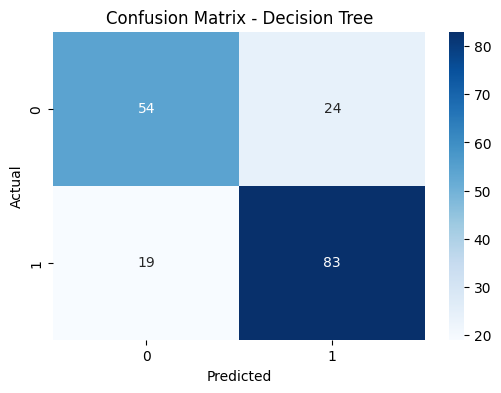

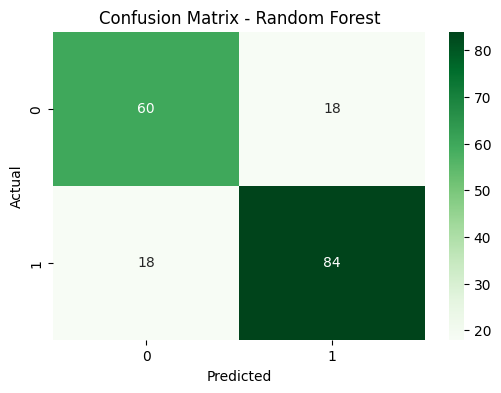

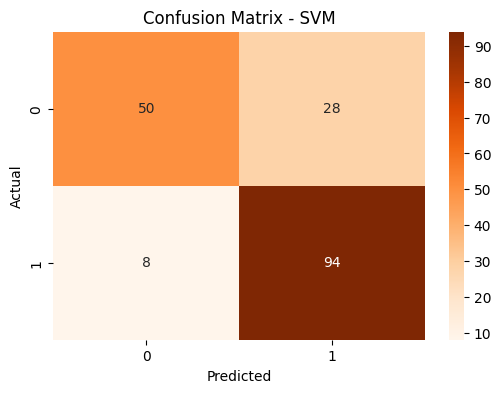

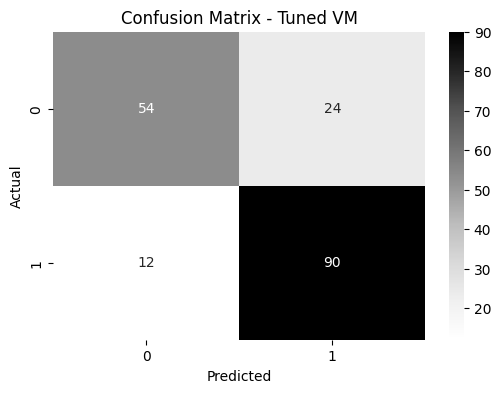

In [19]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix for Tuned SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_svm), annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix - Tuned VM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Confussion Matrix conclusion:

We have a draw between these two:

**SVM model** On the test data has (50) True Positives and True Negatives (94).

**Random Forest** On the test data has (60) True Positives and True Negatives (84).


The Tuned SVM just fall behind 

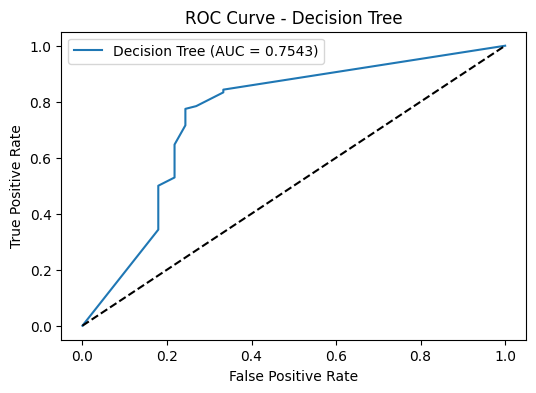

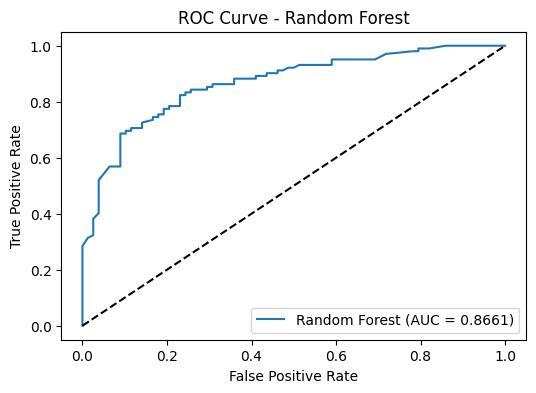

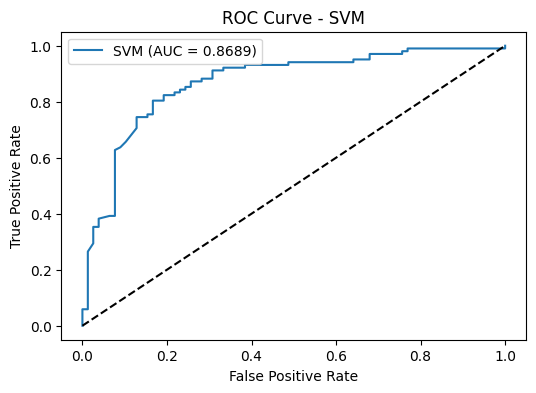

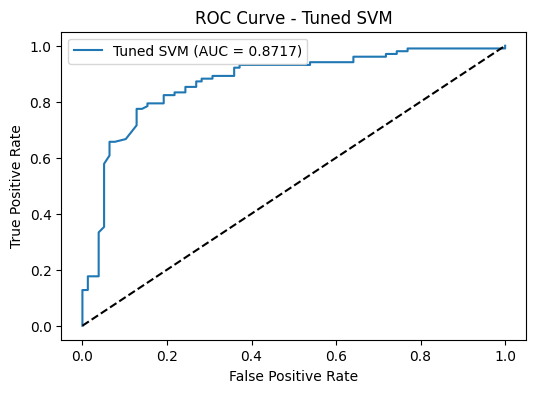

In [20]:
# Decision Tree ROC Curve with AUC
y_test_pred_probs_dt = dt_classifier.predict_proba(X_test)[:, 1]
FPR_dt, TPR_dt, _ = roc_curve(y_test, y_test_pred_probs_dt)
auc_dt = roc_auc_score(y_test, y_test_pred_probs_dt)
plt.figure(figsize=(6, 4))
plt.plot(FPR_dt, TPR_dt, label=f"Decision Tree (AUC = {auc_dt:.4f})")
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Random Forest ROC Curve with AUC
y_test_pred_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]
FPR_rf, TPR_rf, _ = roc_curve(y_test, y_test_pred_probs_rf)
auc_rf = roc_auc_score(y_test, y_test_pred_probs_rf)
plt.figure(figsize=(6, 4))
plt.plot(FPR_rf, TPR_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# SVM ROC Curve with AUC
y_test_pred_probs_svm = svm_classifier.decision_function(X_test)
FPR_svm, TPR_svm, _ = roc_curve(y_test, y_test_pred_probs_svm)
auc_svm = roc_auc_score(y_test, y_test_pred_probs_svm)
plt.figure(figsize=(6, 4))
plt.plot(FPR_svm, TPR_svm, label=f"SVM (AUC = {auc_svm:.4f})")
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Tuned SVM ROC Curve with AUC
y_test_pred_probs_best_svm = best_svm.decision_function(X_test)
FPR_best_svm, TPR_best_svm, _ = roc_curve(y_test, y_test_pred_probs_best_svm)
auc_best_svm = roc_auc_score(y_test, y_test_pred_probs_best_svm)
plt.figure(figsize=(6, 4))
plt.plot(FPR_best_svm, TPR_best_svm, label=f"Tuned SVM (AUC = {auc_best_svm:.4f})")
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve - Tuned SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



## ROC Conclussion

In this case:

**Tuned SVM** curve and AUC coming nearest to 1 make a great ROC performance showing a result of (0.8717) above the others.

## Final thoughts

Lets create a dataset with all the data we just covered
- 1 = win
- 0 = loss

In [21]:
# Placing the data in a dict (Wining and Loses)
data = {
    'Model Evaluation': [0, 1, 1, 1],
    'Bias-Variance': [0, 1, 0, 0],
    'K-Cross Validation': [1, 1, 0, 0],
    'Precision, Recall and F1 Score': [0, 1, 1, 0],
    'Confusion Matrix': [0, 1, 1, 0],
    'ROC Curve': [0, 0, 0, 1]
}

# Models
index_labels = ['Decision Tree', 'Random Forest', 'SVM', 'Tuned SVM']

# Making it a df
thoughts_df = pd.DataFrame(data, index=index_labels)

# Printing it
thoughts_df


,Model Evaluation,Bias-Variance,K-Cross Validation,"Precision, Recall and F1 Score",Confusion Matrix,ROC Curve
Decision Tree,0,0,1,0,0,0
Random Forest,1,1,1,1,1,0
SVM,1,0,0,1,1,0
Tuned SVM,1,0,0,0,0,1


This dataset shows a ranking of each individual ML algorithm performance

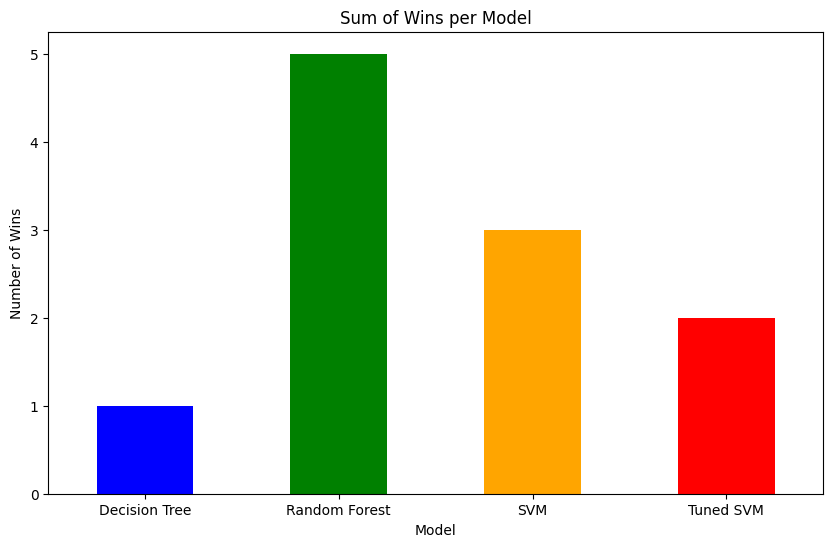

In [22]:
# Which one has more wins?
plt.figure(figsize=(10, 6))
thoughts_df.sum(axis=1).plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Sum of Wins per Model')
plt.ylabel('Number of Wins')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()

Overall the **Random Forest** is the best performer. We will pick the Random Forest to predict whether a student enters or not into the University. By making the highest number of accuracies this ML is the most realiable model for this study.

It made the difference because its performance in the Bias-Variance and K-Cross validation.

Sometimes the simplest is the best.

## References

Anwar Hossain EFAT (2024). Undergraduate Admission Test Survey in Bangladesh. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/ahefatresearch/undergraduate-admission-test-survey-in-bangladesh [Accessed 10 Oct. 2024].

AWS (n.d.). What is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained - AWS. [online] Amazon Web Services, Inc. Available at: https://aws.amazon.com/what-is/hyperparameter-tuning/.

Iqbal, M. (n.d.). Machine Learning HDip in Science for DAB/ AI CCT College Dublin.

Iqbal, M. (n.d.). Machine Learning HDip in Science for DAB/ AI CCT College Dublin Classification and Regression Week 2.

Linkedin Community, A. (2024). How can you use support vector machine algorithms to improve customer retention? [online] Linkedin.com. Available at: https://www.linkedin.com/advice/1/how-can-you-use-support-vector-machine-id7lc [Accessed 10 Oct. 2024].

Lui, D. and Angus, G. (2023). How to Guide: Overcoming overfitting in your ML models - Predibase. [online] Predibase.com. Available at: https://predibase.com/blog/how-to-guide-overcoming-overfitting-in-your-ml-models.

Mujtaba, H. (2020a). An Introduction to Grid Search CV | What is Grid Search. [online] GreatLearning. Available at: https://www.mygreatlearning.com/blog/gridsearchcv/.

Mujtaba, H. (2020b). What is Cross Validation in Machine learning? Types of Cross Validation. [online] GreatLearning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/cross-validation/.

Scikit Learn (2012). 3.2. Tuning the hyper-parameters of an estimator — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/grid_search.html.

Simplilearn (2021). What is Dimensionality Reduction? Overview, and Popular Techniques. [online] Simplilearn.com. Available at: https://www.simplilearn.com/what-is-dimensionality-reduction-article.

Singh, V. (2023). Evaluation Metrics in Machine Learning - Shiksha Online. [online] Shiksha.com. Available at: https://www.shiksha.com/online-courses/articles/evaluating-a-machine-learning-algorithm/.

Terra, J. (2022). What is a ROC Curve, and How Do You Use It in Performance Modeling? | Simplilearn. [online] Simplilearn.com. Available at: https://www.simplilearn.com/what-is-a-roc-curve-and-how-to-use-it-in-performance-modeling-article.

Learn, S. (2024). RocCurveDisplay. [online] scikit-learn. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.RocCurveDisplay.html [Accessed 5 Nov. 2024].

Bobbitt, Z. (2021). How to interpret a confusion matrix for a machine learning model. [online] www.evidentlyai.com. Available at: https://www.evidentlyai.com/classification-metrics/confusion-matrix.

Turing.com. (2022). Different Types of Cross-Validations in Machine Learning and Their Explanations. [online] Available at: https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations# [Accessed 7 Nov. 2024].

James, G., Witten, D., Hastie, T. and Tibshirani, R. (2013). An introduction to statistical learning : with applications in R. [online] Springer, pp.181, 183. Available at: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf.

RudderStack. (n.d.). What is Generalization in Machine Learning? [online] Available at: https://www.rudderstack.com/learn/machine-learning/generalization-in-machine-learning/.